**Rahil Shah**

**EE20B104**

This is a project which predicts the score after 6 overs of the ipl match. The project has been inspired from the lectures of professor Dr. Andrew Thangaraj. And I thank sir for giving us such a project, which helps us in diving deeper in the areas of machine learning, probability, statistics, and data analysis and how these concepts could be used in real life. Without any delays let's begin with the project.

Since the dawn of the IPL in 2008, it has attracted viewers all around the globe. A high level of uncertainty and last moment nail biters has urged fans to watch the matches. Within a short period, IPL has become the highest revenue-generating league of cricket. In a cricket match, we often see the scoreline showing the probability of the team winning based on the current match situation. This prediction is usually done with the help of Data Analytics. Before when there were no advancements in machine learning, the prediction was usually based on intuitions or some basic algorithms. In this project I am going to use Random forest algorithm to predict the score after 6 overs.

The problem statement is as given below:

Given the sample dataset of more than 1700 matches that were played over seasons of 2008-2022. One must be able to predict the score after 6 overs of the match from the data for a particular match in the future given the playing teams, venue, innings number, and the number of wickets during the first 6 overs.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
ipl_data = pd.read_csv("all_matches.csv")
# this data is downloaded from cricsheet.org and it contains ball by ball data for all the ipl matches

relevant_columns = ['match_id', 'venue', 'innings', 'ball', 'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler', 
                   'runs_off_bat', 'extras','season','start_date']
# we keep the relevant columns in the data and remove the rest

ipl_data = ipl_data[relevant_columns]
ipl_data['total_runs'] = ipl_data['runs_off_bat'] + ipl_data['extras']
ipl_data = ipl_data.drop(columns=['runs_off_bat', 'extras'])

# we remove the data after 6 overs as they are not considered in our model
ipl_data = ipl_data[ipl_data['ball']<=5.6]
ipl_data = ipl_data[ipl_data['innings']<=2]   # Removing the possibilities of super overs
ipl_data = ipl_data.groupby(['match_id',
                             'venue',
                             'innings',
                             'batting_team',
                             'bowling_team',
                             'season','start_date'
                              ]).total_runs.sum()
ipl_data = ipl_data.reset_index()
ipl_data = ipl_data.drop(columns=['match_id'])
ipl_data.to_csv("myPreprocessed.csv", index=False)
# saving the data to another file

In [5]:
final_data = pd.read_csv("myPreprocessed.csv") # getting the final data

In [6]:
final_data.head()

,venue,innings,batting_team,bowling_team,season,start_date,total_runs
0,M Chinnaswamy Stadium,1,Kolkata Knight Riders,Royal Challengers Bangalore,2007/08,2008-04-18,61
1,M Chinnaswamy Stadium,2,Royal Challengers Bangalore,Kolkata Knight Riders,2007/08,2008-04-18,26
2,"Punjab Cricket Association Stadium, Mohali",1,Chennai Super Kings,Kings XI Punjab,2007/08,2008-04-19,53
3,"Punjab Cricket Association Stadium, Mohali",2,Kings XI Punjab,Chennai Super Kings,2007/08,2008-04-19,56
4,Feroz Shah Kotla,1,Rajasthan Royals,Delhi Daredevils,2007/08,2008-04-19,40


This is how data has been stored. It gives a sense to us we could utilize the data.

To create a good model we must initially analyze the data and understand some patterns from it.

In [7]:
final_data.tail()

,venue,innings,batting_team,bowling_team,season,start_date,total_runs
1893,"Eden Gardens, Kolkata",2,Lucknow Super Giants,Royal Challengers Bangalore,2022,2022-05-25,62
1894,"Narendra Modi Stadium, Ahmedabad",1,Royal Challengers Bangalore,Rajasthan Royals,2022,2022-05-27,46
1895,"Narendra Modi Stadium, Ahmedabad",2,Rajasthan Royals,Royal Challengers Bangalore,2022,2022-05-27,67
1896,"Narendra Modi Stadium, Ahmedabad",1,Rajasthan Royals,Gujarat Titans,2022,2022-05-29,44
1897,"Narendra Modi Stadium, Ahmedabad",2,Gujarat Titans,Rajasthan Royals,2022,2022-05-29,31


In [8]:
final_data.batting_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

In [9]:
len(final_data.batting_team.unique())

18

We found that 18 different teams have played the ipl so for!! As we know some teams have moved in while others have been moved out from the ipl.

In [10]:
final_data.total_runs.describe()

count    1898.000000
mean       45.678609
std        11.897691
min         2.000000
25%        37.000000
50%        45.000000
75%        53.000000
max       105.000000
Name: total_runs, dtype: float64

We find that the mean of the runs after 6 overs is 46 and with a standard deviation of 12. So, if someone did ask us what will be the score after 6 overs 46 won't be a bad guess. But we have machine learning models which could tell better about it. We will see about it in a while.

In [11]:
latest = final_data[final_data.season == "2022"]
print(latest.batting_team.unique())
len(latest.batting_team.unique())

['Chennai Super Kings' 'Kolkata Knight Riders' 'Mumbai Indians'
 'Delhi Capitals' 'Royal Challengers Bangalore' 'Punjab Kings'
 'Lucknow Super Giants' 'Gujarat Titans' 'Rajasthan Royals'
 'Sunrisers Hyderabad']


10

We see that in this ipl only 10 teams were there and the above array also shows the names of the teams.

In [12]:
latest.total_runs.describe()

count    148.000000
mean      46.662162
std       11.664560
min       14.000000
25%       38.000000
50%       44.000000
75%       55.000000
max       81.000000
Name: total_runs, dtype: float64

We see that the mean in this ipl was still near 46 and standard deviation was 12. Still our guess of 46 might have worked for 2022 season of ipl!!

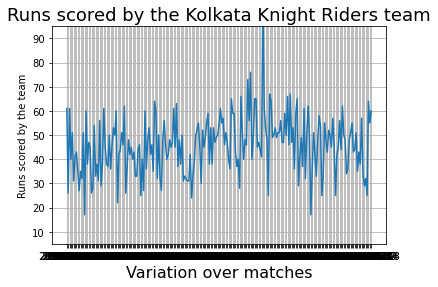

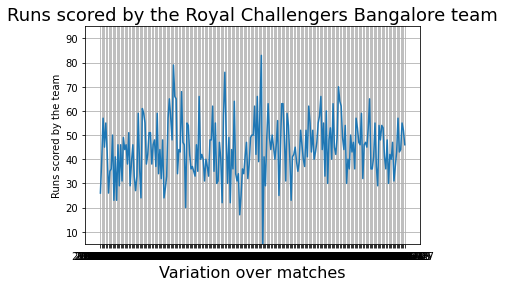

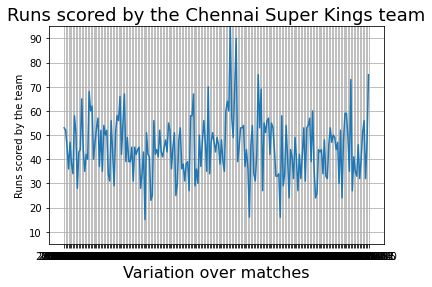

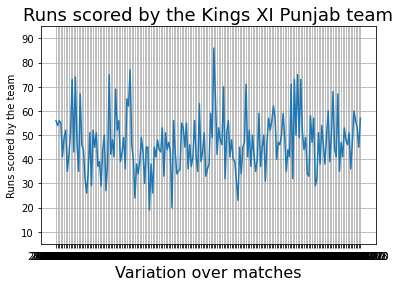

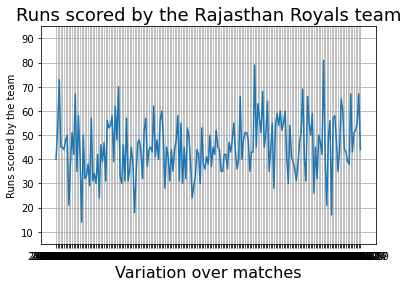

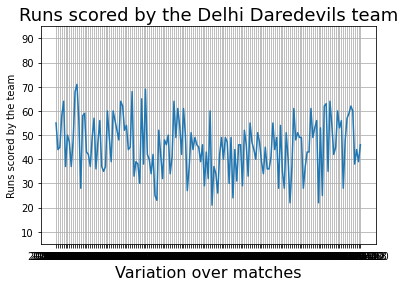

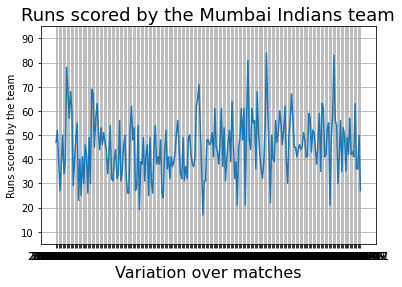

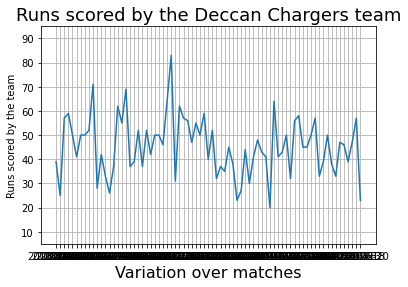

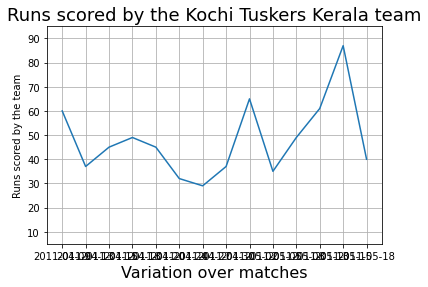

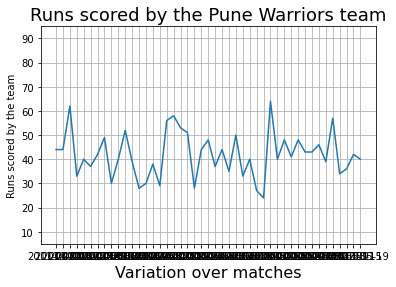

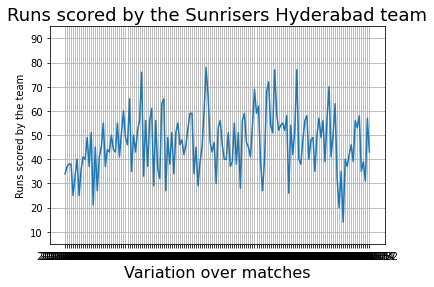

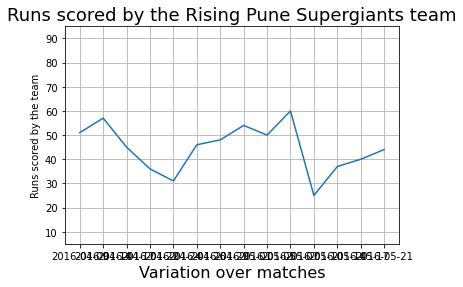

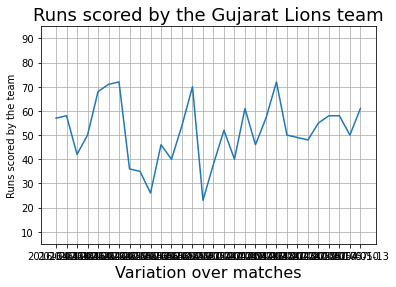

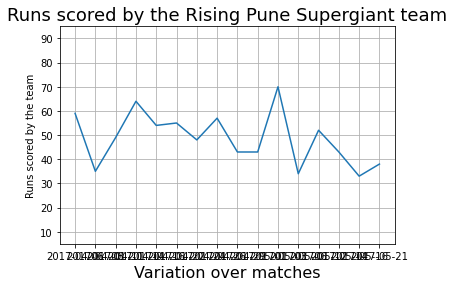

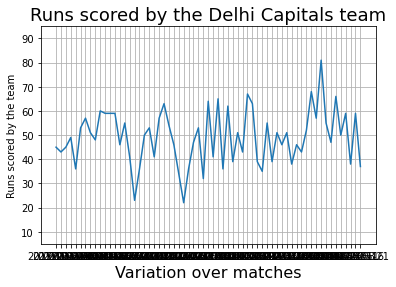

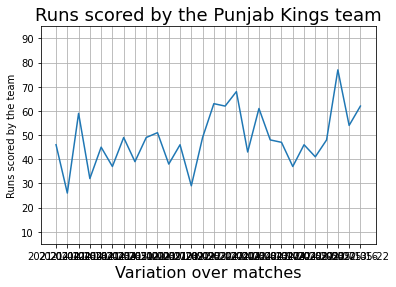

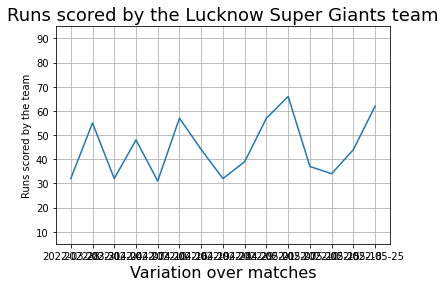

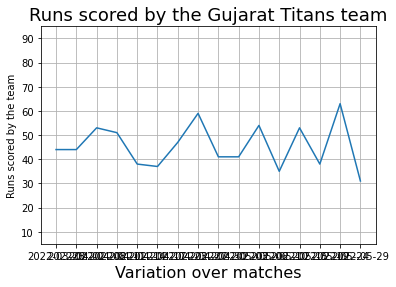

In [13]:
for i in (final_data.batting_team.unique()):
  temp = final_data[final_data.batting_team == i]
  plt.title("Runs scored by the {} team".format(i),size = 18)
  plt.xlabel("Variation over matches",size = 16)
  plt.ylabel("Runs scored by the team")
  plt.plot(temp.start_date,temp.total_runs)
  plt.ylim(5,95)
  plt.grid()
  plt.show()

We see that there has been lot of variation and not a steady pattern which can be seen for the teams.

Let us see how the variation of runs has been over the latest season?

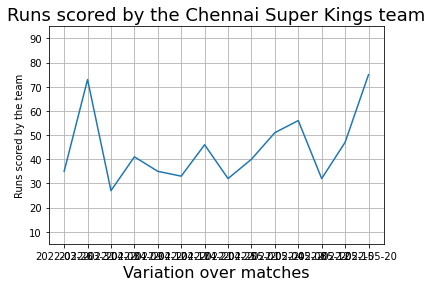

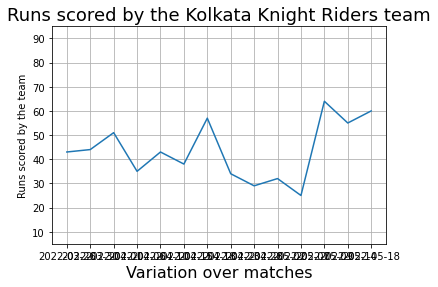

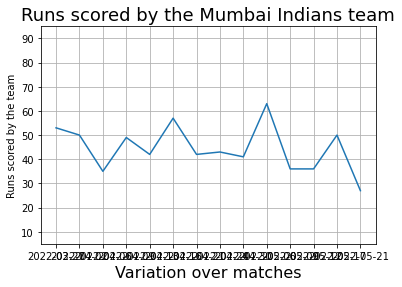

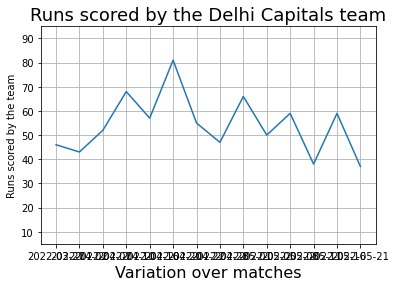

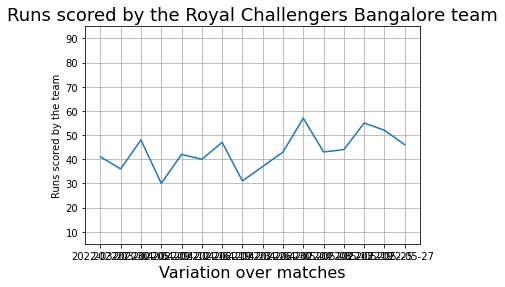

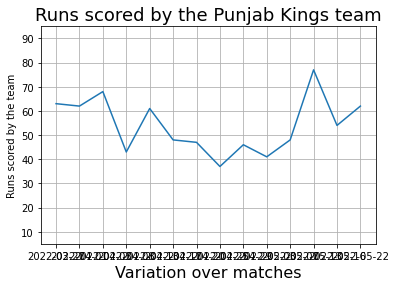

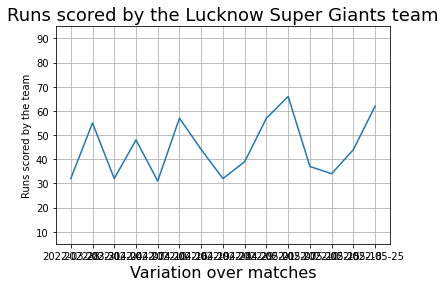

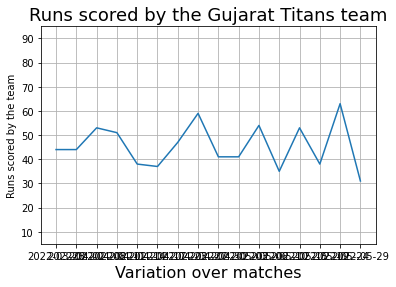

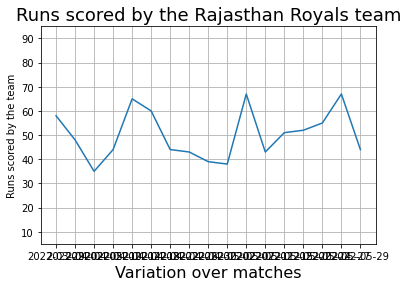

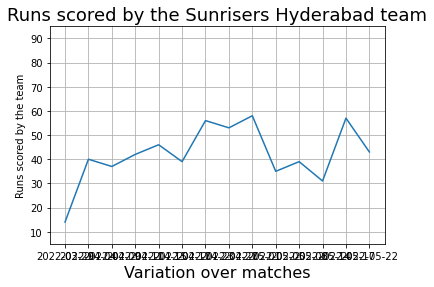

In [14]:
for i in (latest.batting_team.unique()):
  temp = latest[latest.batting_team == i]
  plt.title("Runs scored by the {} team".format(i),size = 18)
  plt.xlabel("Variation over matches",size = 16)
  plt.ylabel("Runs scored by the team")
  plt.ylim(5,95)
  plt.grid()
  plt.plot(temp.start_date,temp.total_runs)
  plt.show()

We see that even during the season there has been a lot of variation among runs scored by different teams. This means that runs scored by a team is a complex pattern from the factors such as dew, previous form, stadium, opposition bowling attack.

We see that Gujrat titans has been quite consistent and it has scored almost 50 runs in every match.

While it is difficult to infer about any other team form these plots!!



---
**Developing a Model to predict the score**


Using a *Random Forest Regressor* model to make predictions

In [16]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import joblib
# Read the data
 
data = pd.read_csv("myPreprocessed.csv")

data = data.drop(columns=['season','start_date'])
# Separate target from predictors
y = data.total_runs
X = data.drop(['total_runs'], axis=1)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)



s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

model = RandomForestRegressor(n_estimators=888, random_state=0)

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=888, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()

# Apply label encoder to each column with categorical data
label_encoder_venue = LabelEncoder()
label_encoder_team = LabelEncoder()
    
label_X_train['venue'] = label_encoder_venue.fit_transform(X_train['venue'])
label_X_train['batting_team'] = label_encoder_team.fit_transform(X_train['batting_team'])
label_X_train['bowling_team'] = label_encoder_team.fit_transform(X_train['bowling_team'])
label_X_valid['venue'] = label_encoder_venue.transform(X_valid['venue'])
label_X_valid['batting_team'] = label_encoder_team.transform(X_valid['batting_team'])
label_X_valid['bowling_team'] = label_encoder_team.transform(X_valid['bowling_team'])
print(score_dataset(label_X_train, label_X_valid, y_train, y_valid))

model.fit(label_X_train, y_train)
joblib.dump(model,'regressor_model1.joblib')
joblib.dump(label_encoder_venue,'label_encoder_venue1.joblib')
joblib.dump(label_encoder_team,'label_encoder_team1.joblib')


9.966960296482355


['label_encoder_team1.joblib']

In [18]:
import os

### Custom definitions and classes if any ###
import pandas as pd
import numpy as np
import joblib
my_path_team = os.path.join("label_encoder_team1.joblib")
my_path_venue = os.path.join("label_encoder_venue1.joblib")
my_path_regressor = os.path.join("regressor_model1.joblib")
def predictRuns(input_test):
    with open(my_path_regressor, 'rb') as f:   #regression_model.joblib
        regressor = joblib.load(f)
    with open(my_path_team, 'rb') as f:  #'label_encoder_team.joblib'
        label_encoder_team = joblib.load(f)
    with open(my_path_venue, 'rb') as f:  #'label_encoder_venue.joblib'
        label_encoder_venue = joblib.load(f)
    test_case = pd.read_csv(input_test)  #input_test
    bats = test_case['batsmen'].str.split(',').apply(len)
    bats = int(bats)    # number of batsman who batted for the 6 overs.
    # This will give us number of wickers taken. And it will help us further 
    # in our prediction

    # droping the irreleavant columns for our model
    test_case.drop(['batsmen'], axis=1)
    test_case.drop(['bowlers'], axis=1)

                          
    test_case['venue'] = label_encoder_venue.transform(test_case['venue'])
    test_case['batting_team'] = label_encoder_team.transform(test_case['batting_team'])
    test_case['bowling_team'] = label_encoder_team.transform(test_case['bowling_team'])
    test_case = test_case[['venue', 'innings', 'batting_team', 'bowling_team']]
    if bats <=2:    # Zero wickets have been taken naturally the score must be a little higher
        return int(regressor.predict(test_case) + 7) 
    if bats ==3:    # 1 wicket has been taken this means that we would have near to the predicted score
        return int(regressor.predict(test_case))  
    if bats == 4:   # 2 wickets have been taken this means the score will be little lesser
        return int(regressor.predict(test_case) - 15)
    if bats == 5:   # 3 wickets have been taken this means the score will be little more lesser
        return int(regressor.predict(test_case) - 17)
    if bats == 6:   # 4 wickets have been taken this means the score will be quite less
        return int(regressor.predict(test_case) - 20)
    if bats >= 6:   # 5 wickets have been taken this means the score will be quite less
        return int(regressor.predict(test_case) - 25)
    # The increase and decrease of runs have been based on the intution that as wickets increase the runs will get lower
    # Even wickets could be added as a feature to our machine learning model

In [19]:
import os
# add imports - classes and defs
import pandas as pd
import numpy as np
#from sklearn.model_selection import train_test_split


#read the data
#ipl_data = pd.read_csv("C:/Users/rahilamit shah/Desktop/predictive analysis/all_matches.csv")
#from predictor import predictRuns

my_path = os.path.join("Apr-27-inn2.csv")   #"C:\Users\rahilamit shah\Desktop\predictive analysis\sampleinput_files\Apr-26-inn1.csv"
runs = predictRuns(my_path)       #'inputFile.csv'
print("Predicted Runs: ", runs)

Predicted Runs:  41


The orignal match held on 27 April 2021 at Narendra modi stadium, Ahmedabad in innings 2 had a total score of 43 after 6 overs of play.

In [20]:
my_path = os.path.join("Apr-30-inn1.csv")   #"C:\Users\rahilamit shah\Desktop\predictive analysis\sampleinput_files\Apr-26-inn1.csv"
runs = predictRuns(my_path)       #'inputFile.csv'
print("Predicted Runs: ", runs)

Predicted Runs:  46


The orignal match held on 30 April 2021 at Narendra modi stadium, Ahmedabad in innings 2 had a total score of 49 after 6 overs of play.

---
Thank you very much for reading till the end. Hope you liked it.

This has been my very first machine learning project, hence I may have commited many mistakes. Hence, I request you to correct me wherever I would have been wrong.

Ideas to take this project ahead and making it better:


1. All batsman can be encoded and given ranks and we can develope a model for each batsman to get which batsman will score how much.

2. Similar thing could be done for bowlers.

3. Data can be vizualized a bit more to get some patterns from it.

4. Better machine learning models can be used for prediction such as Xgboost regressor, even deep learning models may perform better.

5. Some feature engineering could may be done and some more releavant features can be added to this model.

**--------------------------------Thank you-----------------------------------------**